<a href="https://colab.research.google.com/github/SanjanaMohile/ALY6000-FINALPROJECT/blob/main/Mohile_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEART FAILURE PREDICTION DATASET

#### DATA READING

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import plotly.graph_objects as go

In [23]:
# importing files this way is easy and you can import any type i.e. csv,text without change in syntax
from google.colab import files
uploaded = files.upload()

Saving heart unclean.csv to heart unclean.csv


#### DATA UNDERSTANDING

In [71]:
df = pd.read_csv(io.BytesIO(uploaded['heart unclean.csv']))
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseA0gi0a,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,NaN,180.0,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150.0,NaN,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,1,1.2,Flat,1
916,57,F,ATA,NaN,236.0,0,LVH,174,0,0.0,Flat,1


In [29]:
df.nunique()                              ## shows how many unique observations are there per row

Age                50
Sex                 2
ChestPainType       4
RestingBP          66
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseA0gi0a      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [30]:
df.info()   ## Here we understand that the total observations are 918 but RestingBP and Cholesterol are two columns with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       895 non-null    float64
 4   Cholesterol     908 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseA0gi0a  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 86.2+ KB


In [33]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseA0gi0a,Oldpeak,HeartDisease
count,918.000000,895.000000,908.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.425698,198.209251,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,18.465422,109.445411,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.750000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [35]:
df.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

In [36]:
df.groupby('Sex').count()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseA0gi0a,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,193,193,182,190,193,193,193,193,193,193,193
M,725,725,713,718,725,725,725,725,725,725,725


#### DATA VISUALIZATION

In [38]:
young = np.sum((df['Age']>=0) & (df['Age']<20))
adult = np.sum((df['Age']>=20) & (df['Age']<40))
midage = np.sum((df['Age']>=40) & (df['Age']<60))
old = np.sum((df['Age']>=60))
print("\n young =",young,"\n","adult =",adult,"\n","midage =",midage,"\n","old =",old)


 young = 0 
 adult = 80 
 midage = 585 
 old = 253


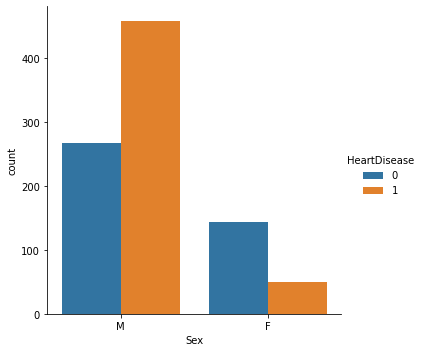

In [39]:
sns.catplot(x='Sex',hue='HeartDisease',kind='count',data=df)

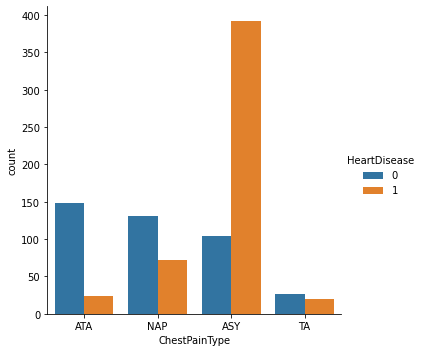

In [40]:
sns.catplot(x='ChestPainType',hue='HeartDisease',kind='count',data=df)

In [44]:
labels = ['Heart disease', 'Normal']
values = df['HeartDisease'].value_counts()
colors = ['darkblue', 'royalblue']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='HeartDisease', 
                                    x=0.50, y=0.5, font_size=13, 
                                    showarrow=False)])
fig.show()

In [49]:
non_numerical_data=[f for f in df.columns if df[f].dtype=='O']
non_numerical_data

['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope']

In [50]:
numerical_data=[f for f in df.columns if df[f].dtype!='O']
numerical_data

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseA0gi0a',
 'Oldpeak',
 'HeartDisease']

In [51]:
numerical_data_contineous=[f for f in numerical_data if df[f].nunique()>25]
numerical_data_contineous

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [52]:
numerical_data_discrete=[f for f in numerical_data if df[f].nunique()<25]
numerical_data_discrete

['FastingBS', 'ExerciseA0gi0a', 'HeartDisease']

#### Univariate Analysis

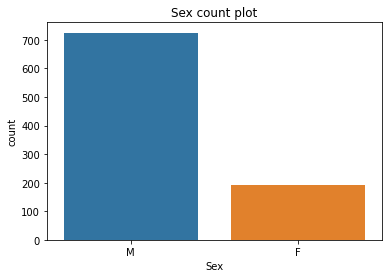

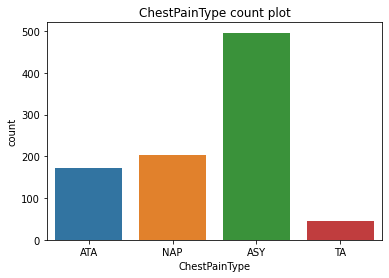

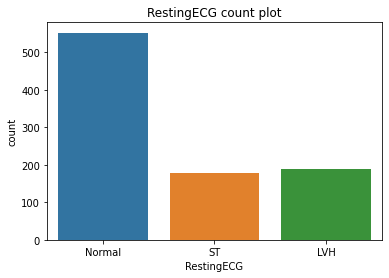

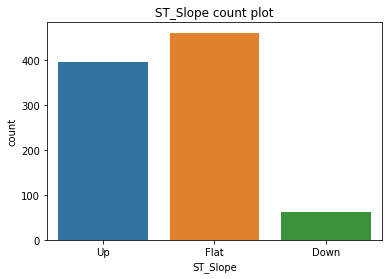

In [54]:
for f in non_numerical_data:
    sns.countplot(x=f,data=df)
    plt.title(f+' count plot')
    plt.show()

Let us go through the observations we made in this portion.

1.The number of men suffering from heartDisease is significantly larger than the number of women.

2.The chest pain type for people suffering with heartDisease is mostly ASY

3.The RestingECG for most people suffering with heartDisease is Normal

4.Most people had exercise induced Angina.

5.The ST slope for most people suffering with heartDisease is flat

the median value for the feature Age is 54.0


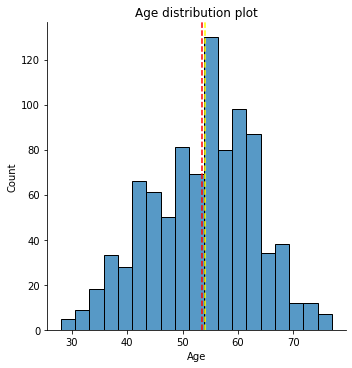

the median value for the feature RestingBP is 130.0


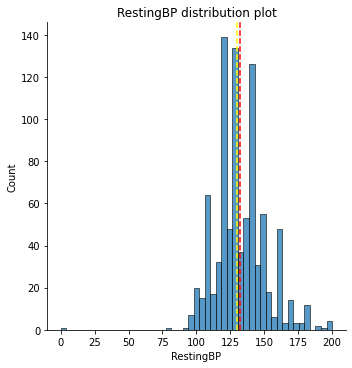

the median value for the feature Cholesterol is 223.0


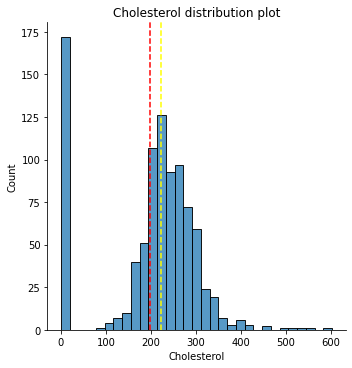

the median value for the feature MaxHR is 138.0


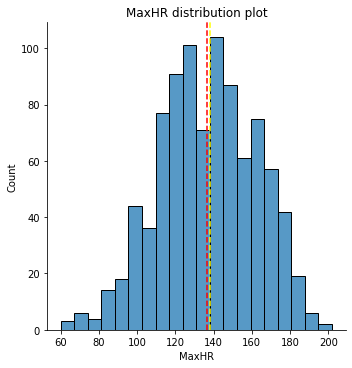

the median value for the feature Oldpeak is 0.6


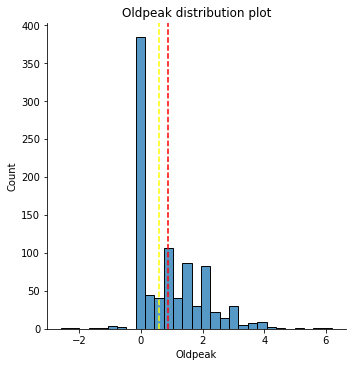

In [56]:
for f in numerical_data_contineous:
    sns.displot(x=df[f])
    print('the median value for the feature '+f+' is',df[f].median())
    plt.axvline(df[f].mean(), linestyle = '--', color = "red")
    plt.axvline(df[f].median(), linestyle = '--', color = "yellow")
    plt.title(f+' distribution plot')
    plt.show()

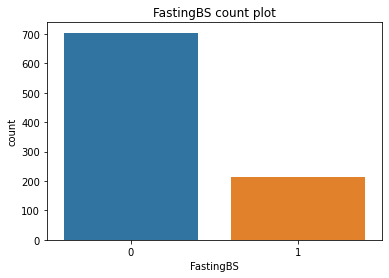

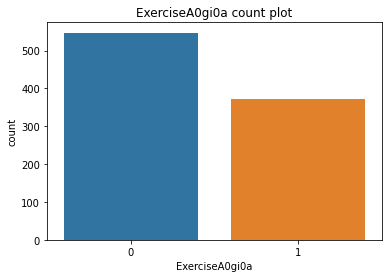

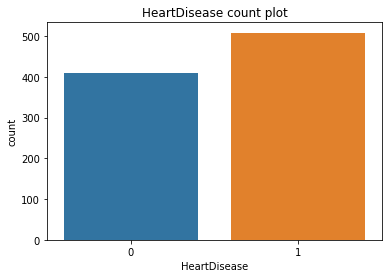

In [58]:
for f in numerical_data_discrete:
    sns.countplot(x=f,data=df)
    plt.title(f+' count plot')
    plt.show()

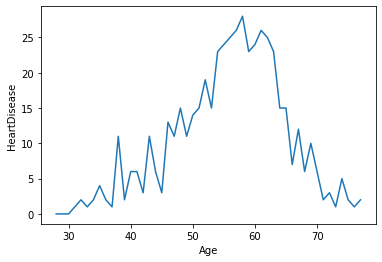

In [72]:
dt=pd.DataFrame()
dt=df.groupby(['Age'])[['HeartDisease']].sum()
sns.lineplot(x='Age',y='HeartDisease',data=dt)
plt.show()

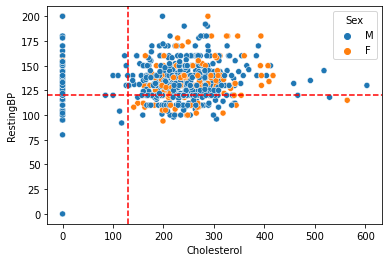

In [74]:
sns.scatterplot(x='Cholesterol',y='RestingBP',hue='Sex',data=df)
plt.axvline(129, linestyle = '--', color = "red") #normal level for LDL 
plt.axhline(120, linestyle = '--', color = "red") #normal resting BP
plt.show()